# 로지스틱 회귀분석

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report


In [42]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [44]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [45]:
df_raw["JOB"].fillna("OTHER", inplace=True)

In [46]:
df_raw.fillna(df_raw.mean(), inplace=True)

/tmp/ipykernel_5435/561761817.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [47]:
df_train, df_test= train_test_split(df_raw, test_size=0.3, random_state=1234)
print("train data size :{}".format(df_train.shape))
print("test data size :{}".format(df_test.shape))

train data size :(2623, 13)
test data size :(1125, 13)


In [48]:
log_model=Logit.from_formula("""BAD ~LOAN+MORTDUE+VALUE+ C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_train)

In [49]:
log_result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.236357
         Iterations 30


In [16]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2605
Method:                           MLE   Df Model:                           17
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2298
Time:                        11:49:44   Log-Likelihood:                -619.97
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 3.585e-68
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0144      0.559     -8.976      0.000      -6.109      -3.919
C(REASON)[T.HomeImp]    -0.0213      0.177     -0.120      0.904      -0.368       0.326
C(JOB)[T.OTH

In [17]:
log_model=Logit.from_formula("""BAD ~C(REASON)+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_train)

In [18]:
log_result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.242107
         Iterations 8


In [19]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2615
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2110
Time:                        11:50:03   Log-Likelihood:                -635.05
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.951e-69
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.5012      0.494    -11.136      0.000      -6.469      -4.533
C(REASON)[T.HomeImp]     0.0242      0.171      0.141      0.888      -0.312       0.360
DEROG       

In [20]:
y_pred_train= log_result.predict(df_train)

In [21]:
y_pred_train_class=(y_pred_train>0.5).astype(int)
print("Test 예측 결과\n",y_pred_train_class.head(),"\n")
print("Confusion Matrix:\n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)),"\n")

Test 예측 결과
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix:
[[2371   11]
 [ 193   48]] 



In [22]:
y_pred_test= log_result.predict(df_test)

In [24]:
y_pred_test_class=(y_pred_test>0.5).astype(int)
print("Test 예측 결과\n",y_pred_test_class.head(),"\n")
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)),"\n")

Test 예측 결과
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Matrix:
[[1018    3]
 [  81   23]] 



In [25]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_train["BAD"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)),"\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["BAD"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)),"\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.922

Confusion Matrix:
[[2371   11]
 [ 193   48]] 

              precision    recall  f1-score   support

           0      0.925     0.995     0.959      2382
           1      0.814     0.199     0.320       241

    accuracy                          0.922      2623
   macro avg      0.869     0.597     0.639      2623
weighted avg      0.915     0.922     0.900      2623

Test 예측/분류 결과
Accuracy:0.925

Confusion Matrix:
[[1018    3]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.997     0.960      1021
           1      0.885     0.221     0.354       104

    accuracy                          0.925      1125
   macro avg      0.905     0.609     0.657      1125
weighted avg      0.922     0.925     0.904      1125



<Axes: >

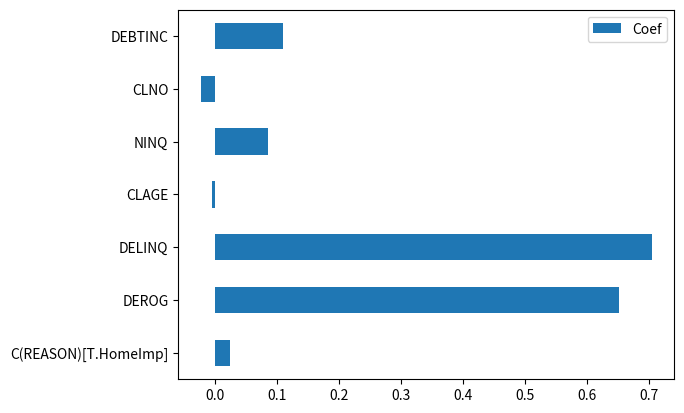

In [27]:
df_logistic_coef=pd.DataFrame({"Coef": log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [29]:
df_char= df_raw.select_dtypes(include="object")
df_numeric=df_raw.select_dtypes(exclude="object")

In [31]:
scaler=StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled= pd.DataFrame(np_numeric_scaled, columns= df_numeric.columns)

In [32]:
df_scaled= pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [56]:
df_scaled["BAD"]=np.where(df_scaled["BAD"]>0,1,0)

In [57]:
df_scaled_train, df_scaled_test= train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [58]:
scaled_log_model=Logit.from_formula("""BAD ~LOAN+C(JOB)+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_scaled_train)

In [59]:
scaled_log_result=scaled_log_model.fit()

         Current function value: 0.236586
         Iterations: 35


/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
print(scaled_log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2609
Method:                           MLE   Df Model:                           13
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2290
Time:                        14:25:59   Log-Likelihood:                -620.57
converged:                      False   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 9.050e-71
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4939      0.196    -12.716      0.000      -2.878      -2.109
C(JOB)[T.OTHER]     -16.4351   1689.168     -0.010      0.992   -3327.143    3294.273
C(JOB)[T.Office]     -0.

<Axes: >

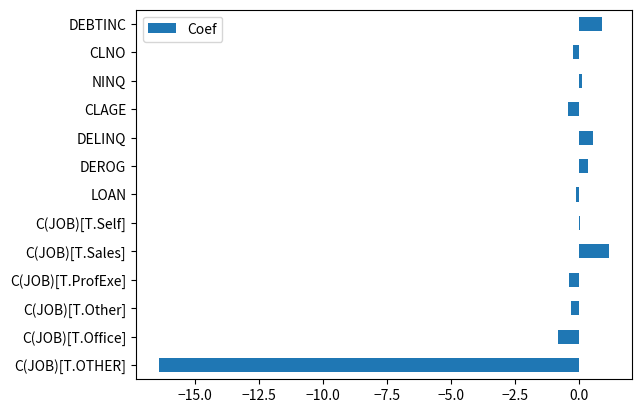

In [61]:
df_log_scaled_coef=pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef")

# 의사결정나무

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.tree import export_graphviz

import graphviz

from subprocess import call
from IPython.display import Image

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV



from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw["JOB"].fillna("OTHER", inplace=True)

In [4]:
df_raw.fillna(df_raw.mean(), inplace=True)

/tmp/ipykernel_7706/561761817.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [5]:
df_raw_dummy= pd.get_dummies(df_raw)

In [6]:
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,0,1,0,0,0,0


In [7]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)

In [8]:
df_raw_y=df_raw_dummy["BAD"]

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=1234)

In [10]:
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (3748, 19)
분할 후 설명변수 데이터: Train (2623, 19)  Test (1125, 19)


In [11]:
from imblearn.over_sampling import SMOTE

print(df_raw.value_counts(["BAD"]),"\n")
print("BAD=1 비율", df_raw.value_counts(df_raw["BAD"]==1)/len(df_raw))

plt.figure(figsize=(10,8))
df_raw['color']=np.where(df_raw["BAD"]==1, "red","blue")



BAD
0      3403
1       345
dtype: int64 

BAD=1 비율 BAD
False    0.907951
True     0.092049
dtype: float64


<Figure size 1000x800 with 0 Axes>

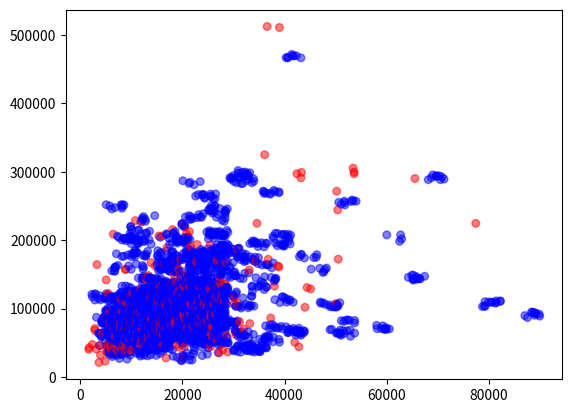

In [12]:
plt.scatter(df_raw['LOAN'],df_raw['VALUE'],c= df_raw['color'], s=30, alpha=0.5)
plt.show()

In [13]:
sm=SMOTE(sampling_strategy='auto')

x_resampled, y_resampled =sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))


Over-Sampling 전:
 0    2382
1     241
Name: BAD, dtype: int64 

Over-Sampling 후 Train X:(4764, 19)
Over-Sampling 후 Train Y:(4764,)

Over-Sampling 후 '1':2382
Over-Sampling 후 '0':2382


In [14]:
tree_uncust=DecisionTreeClassifier(random_state=1234)
tree_uncust.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.927


In [15]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [16]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(3,12)]

for v_max_depth in para_depth :
    tree= DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [17]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.934,0.921
1,4,0.937,0.929
2,5,0.940,0.929
3,6,0.941,0.929
4,7,0.947,0.936
5,8,0.951,0.935
6,9,0.957,0.933
7,10,0.960,0.937
8,11,0.963,0.937


In [18]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.934,0.921
1,4,0.937,0.929
2,5,0.940,0.929
3,6,0.941,0.929
4,7,0.947,0.936
5,8,0.951,0.935
6,9,0.957,0.933
7,10,0.960,0.937
8,11,0.963,0.937


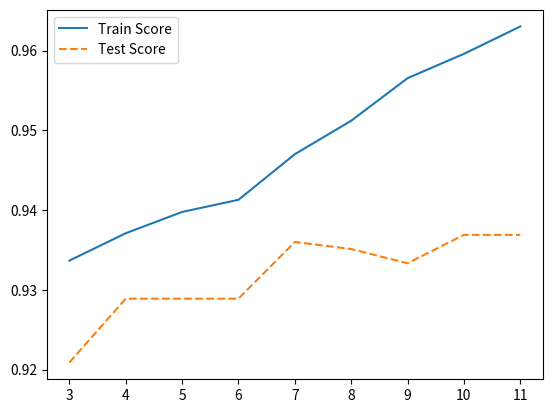

In [19]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

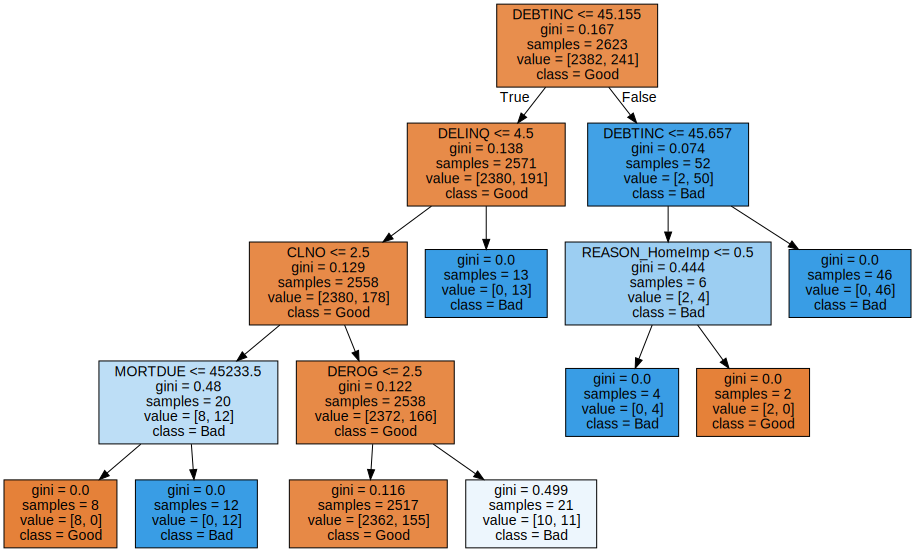

In [20]:
v_feature_name=df_train_x.columns
tree_low= DecisionTreeClassifier(max_depth=4, random_state=1234,)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


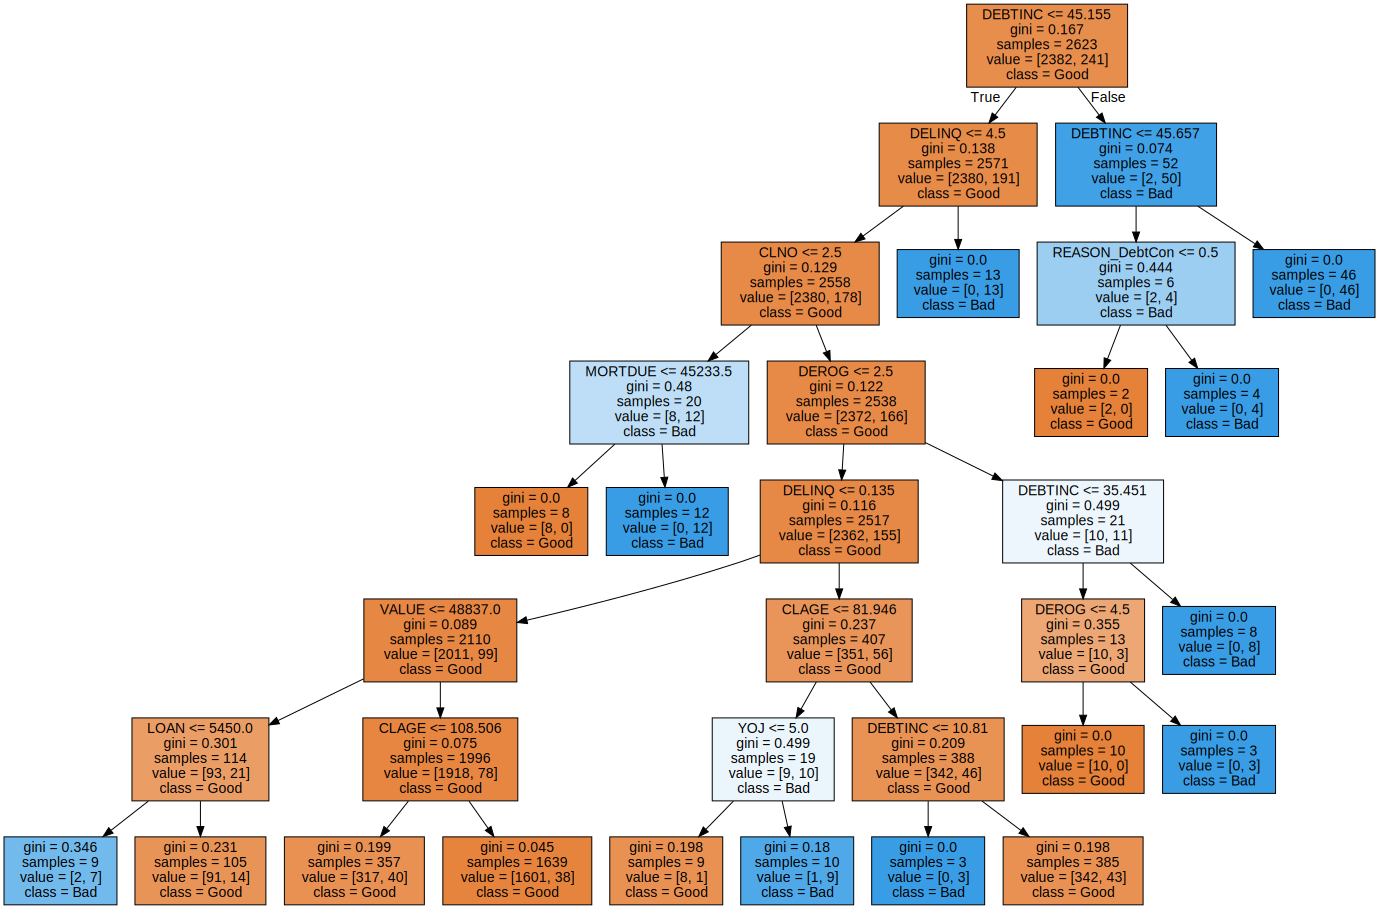

In [21]:
v_feature_name=df_train_x.columns
tree_low= DecisionTreeClassifier(max_depth=7, random_state=1234,)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [22]:
print("전체 자료=", df_train_x.shape[0],"개")
print("전체 자료의 1% =",df_train_x.shape[0]*0.01,"개")

전체 자료= 2623 개
전체 자료의 1% = 26.23 개


In [23]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*2 for n_split in range(2,15)]

for v_min_samples_split in para_split :
    tree= DecisionTreeClassifier(max_depth=4, min_samples_split=v_min_samples_split, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [24]:
df_accuracy_split= pd.DataFrame()
df_accuracy_split["Depth"]=para_split
df_accuracy_split["TrainScore"]= train_accuracy
df_accuracy_split["TestScore"]=test_accuracy
df_accuracy_split.round(3)

,Depth,TrainScore,TestScore
0,4,0.937,0.929
1,6,0.937,0.929
2,8,0.936,0.928
3,10,0.936,0.928
4,12,0.936,0.928
5,14,0.936,0.928
6,16,0.936,0.928
7,18,0.936,0.928
8,20,0.936,0.928
9,22,0.933,0.921


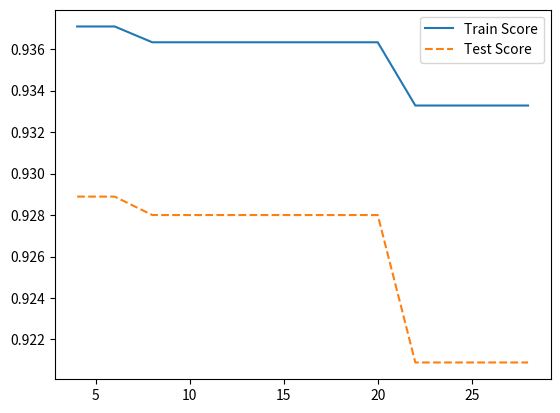

In [25]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

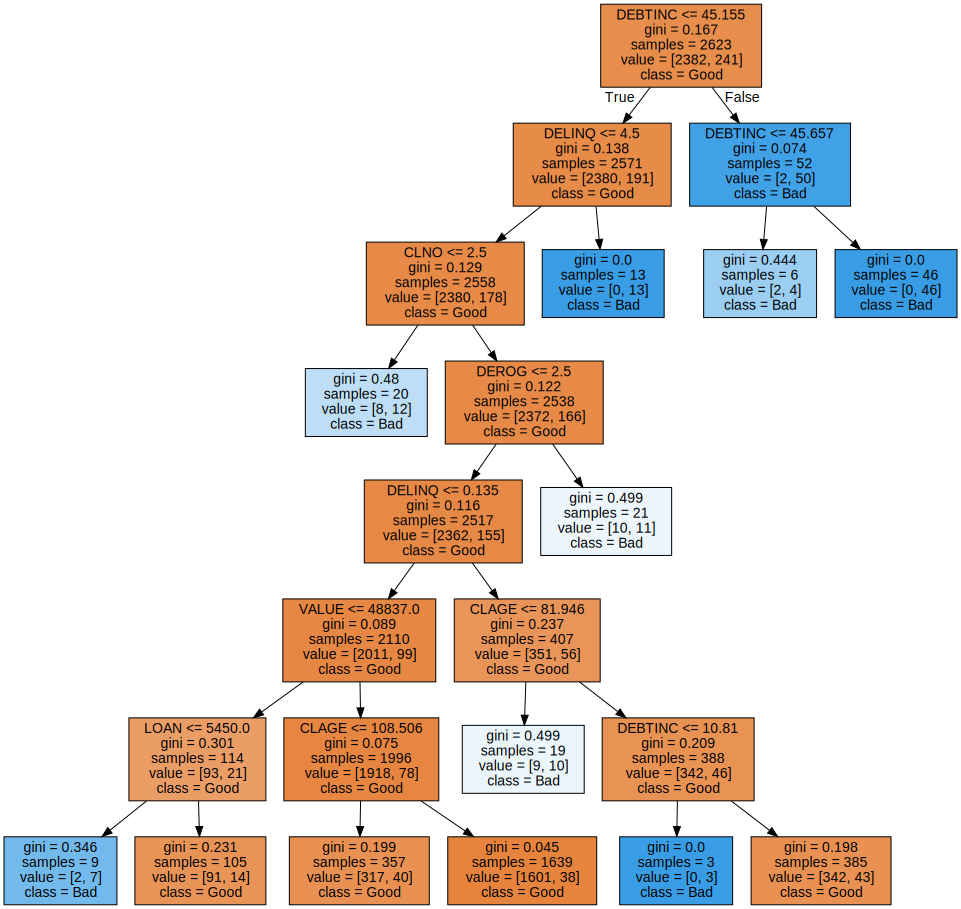

In [26]:
tree_low= DecisionTreeClassifier(max_depth=7, min_samples_split=50,random_state=1234,)
tree_low.fit(df_train_x, df_train_y)


export_graphviz(tree_low, out_file="tree_low.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


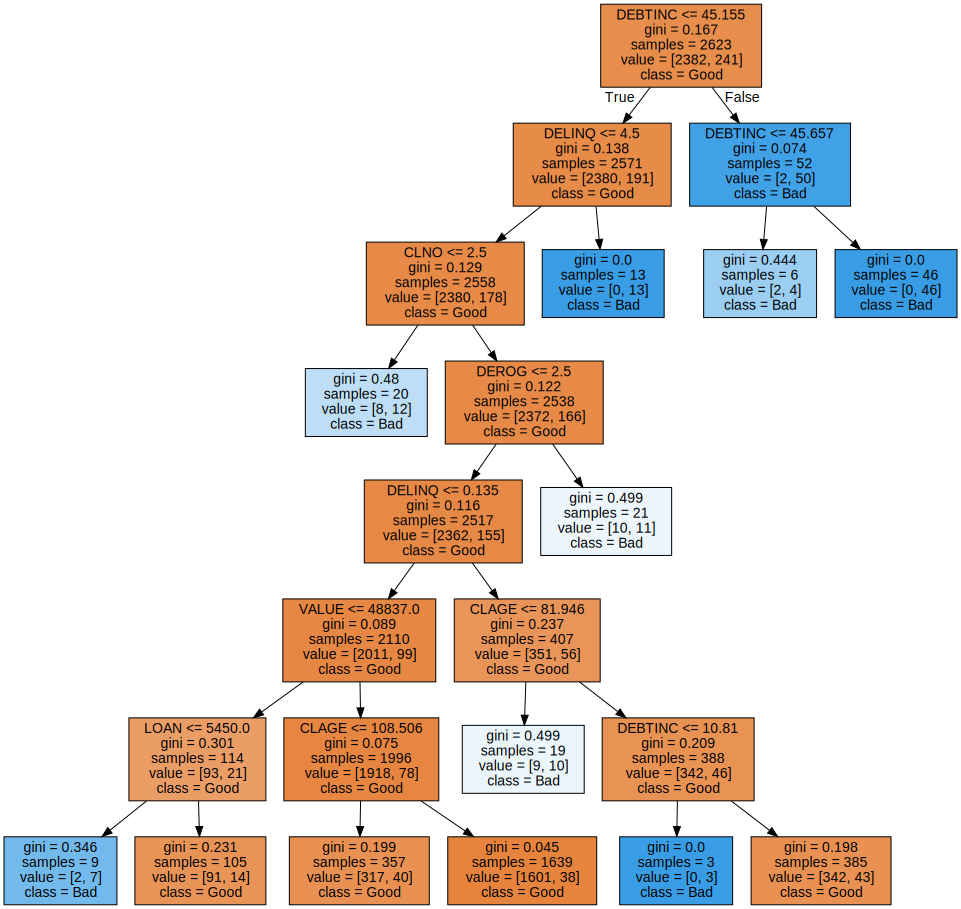

In [27]:
tree_high= DecisionTreeClassifier(max_depth=7, min_samples_split=110, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [28]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf :
    tree= DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth=7, min_samples_split=50, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

In [29]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["MinSampleLeaf"]=para_leaf
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,10,0.935,0.919
1,12,0.935,0.918
2,14,0.934,0.922
3,16,0.934,0.922
4,18,0.934,0.922
5,20,0.934,0.920
6,22,0.934,0.927
7,24,0.934,0.927
8,26,0.934,0.927
9,28,0.933,0.925


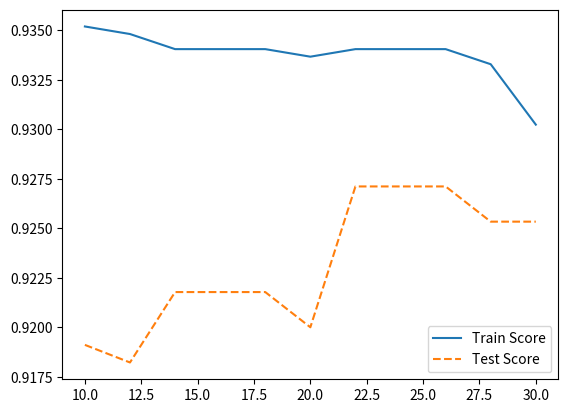

In [30]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Score")
plt.legend()

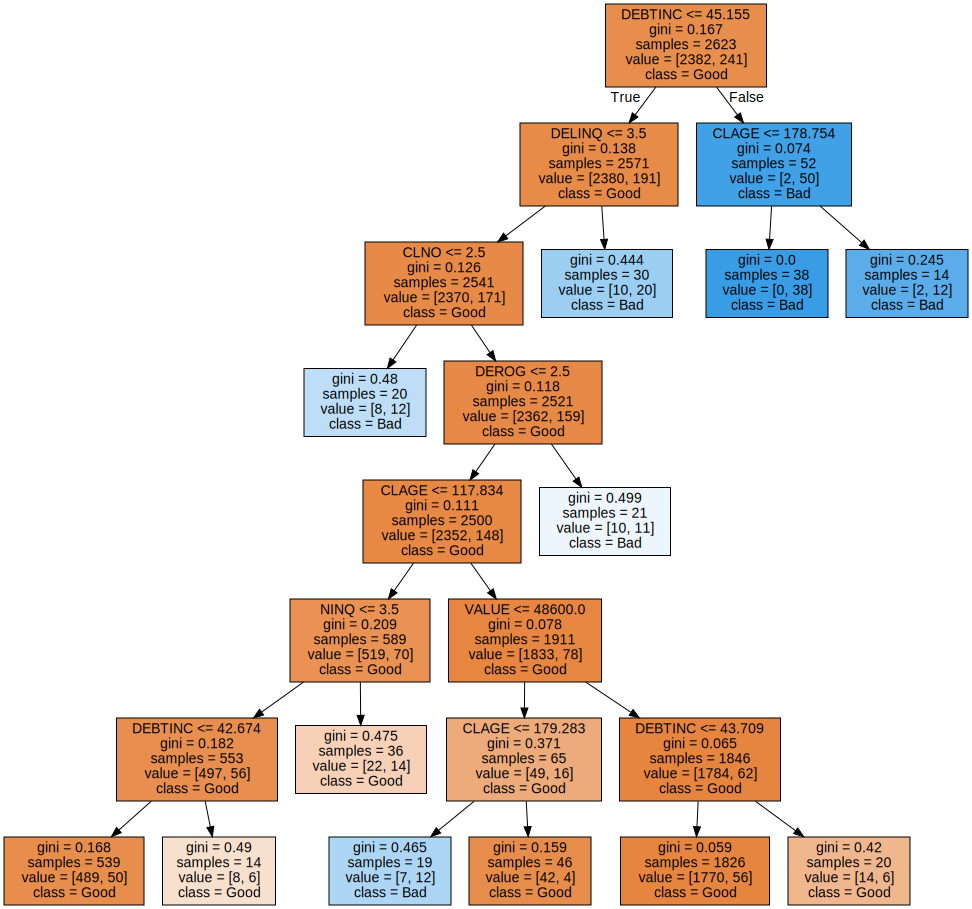

In [31]:
tree_low= DecisionTreeClassifier(max_depth=7, min_samples_split=50,min_samples_leaf=14,random_state=1234,)
tree_low.fit(df_train_x, df_train_y)


export_graphviz(tree_low, out_file="tree_low.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)
with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


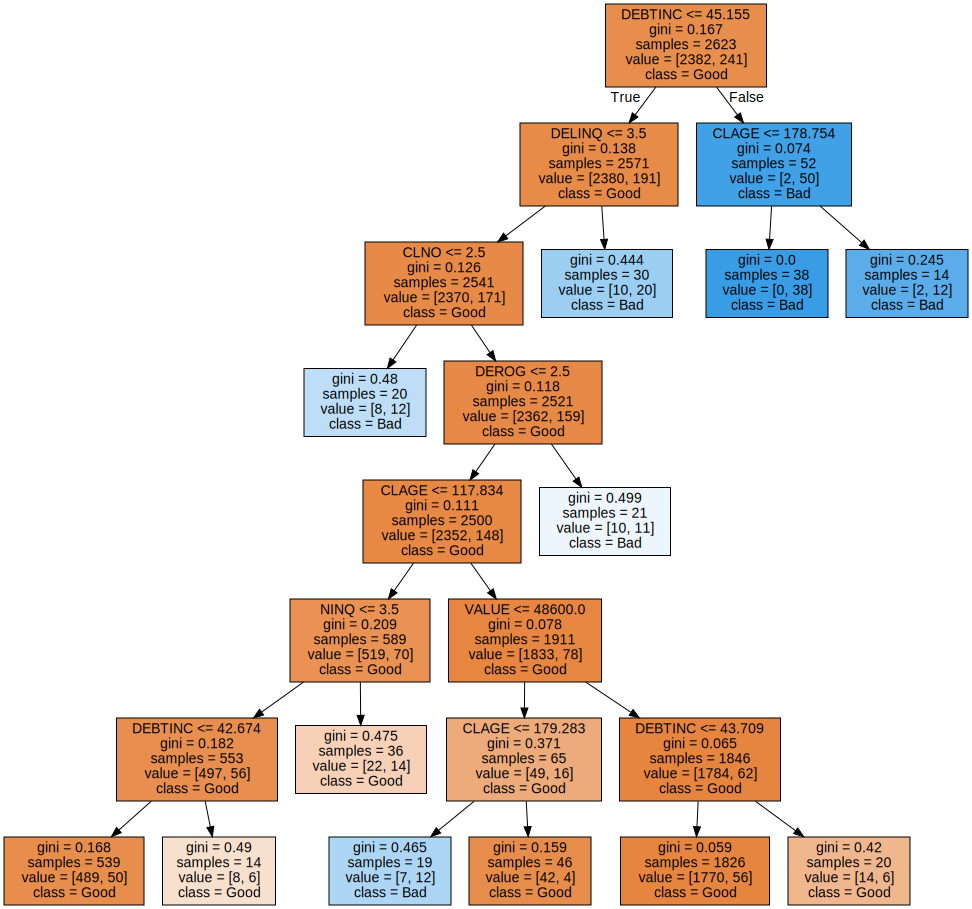

In [32]:
tree_high= DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=18,random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


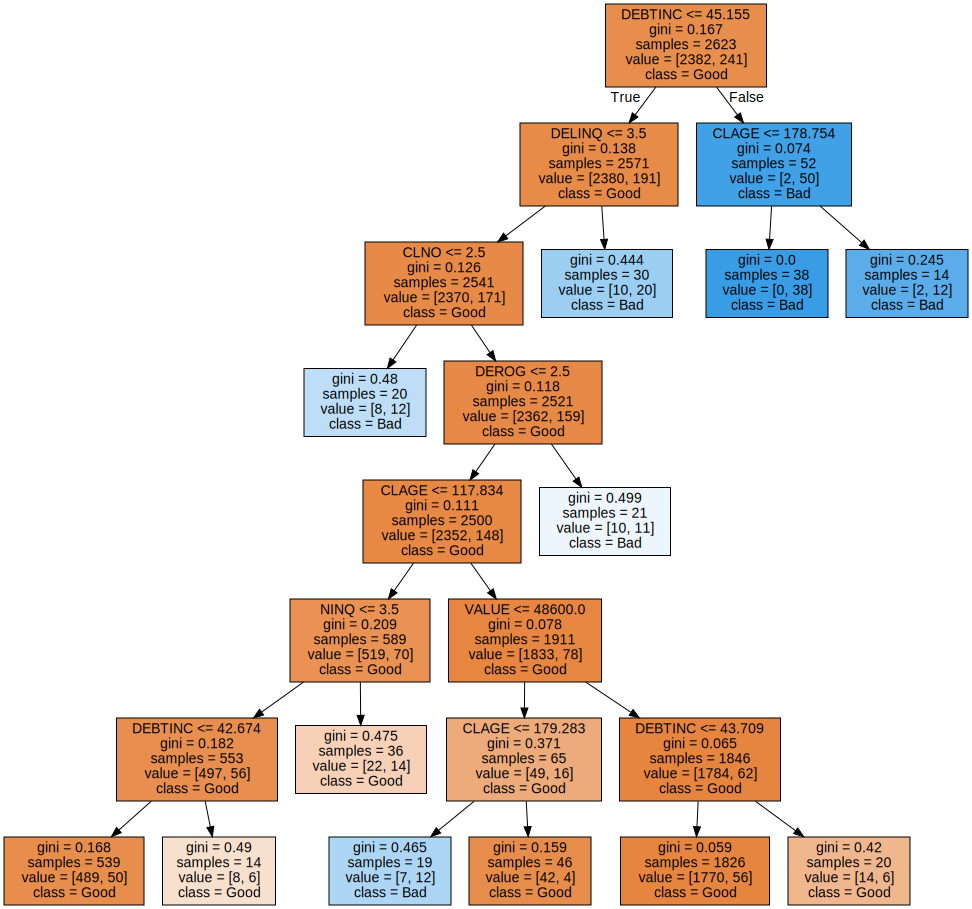

In [33]:
tree_final= DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14,random_state=1234)
tree_final.fit(df_train_x, df_train_y)
export_graphviz(tree_final, out_file="tree_final.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [34]:
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy:0.922

Test Confusion Matrix:
[[1002   19]
 [  69   35]]
              precision    recall  f1-score   support

           0      0.936     0.981     0.958      1021
           1      0.648     0.337     0.443       104

    accuracy                          0.922      1125
   macro avg      0.792     0.659     0.700      1125
weighted avg      0.909     0.922     0.910      1125



In [35]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_

In [36]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
9,DEBTINC,0.563
5,DELINQ,0.139
6,CLAGE,0.091
8,CLNO,0.075
4,DEROG,0.059
2,VALUE,0.037
7,NINQ,0.037
13,JOB_OTHER,0.000
17,JOB_Sales,0.000
16,JOB_ProfExe,0.000


Text(0, 0.5, '설명변수')

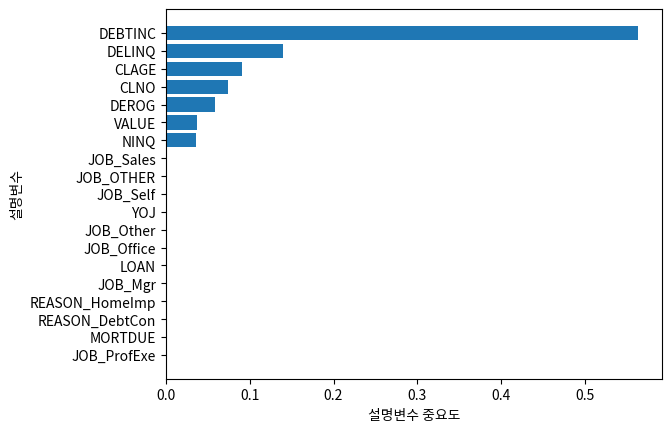

In [37]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [38]:
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over= train_test_split(x_resampled,y_resampled, test_size=0.3, stratify=y_resampled, random_state=1234)
print("분할 전 데이터 현황...설명:", x_resampled.shape," 목표:",y_resampled.shape)
print("분할 전 설명변수 현황...Train:", df_train_x_over.shape, " Test", df_test_x_over.shape)
print("분할 후 목표변수 현황...Train:", df_train_y_over.value_counts()," Test", df_test_y_over.value_counts())

분할 전 데이터 현황...설명: (4764, 19)  목표: (4764,)
분할 전 설명변수 현황...Train: (3334, 19)  Test (1430, 19)
분할 후 목표변수 현황...Train: 1    1667
0    1667
Name: BAD, dtype: int64  Test 1    715
0    715
Name: BAD, dtype: int64


In [39]:
tree_final_over= DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14,random_state=1234)
tree_final_over.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

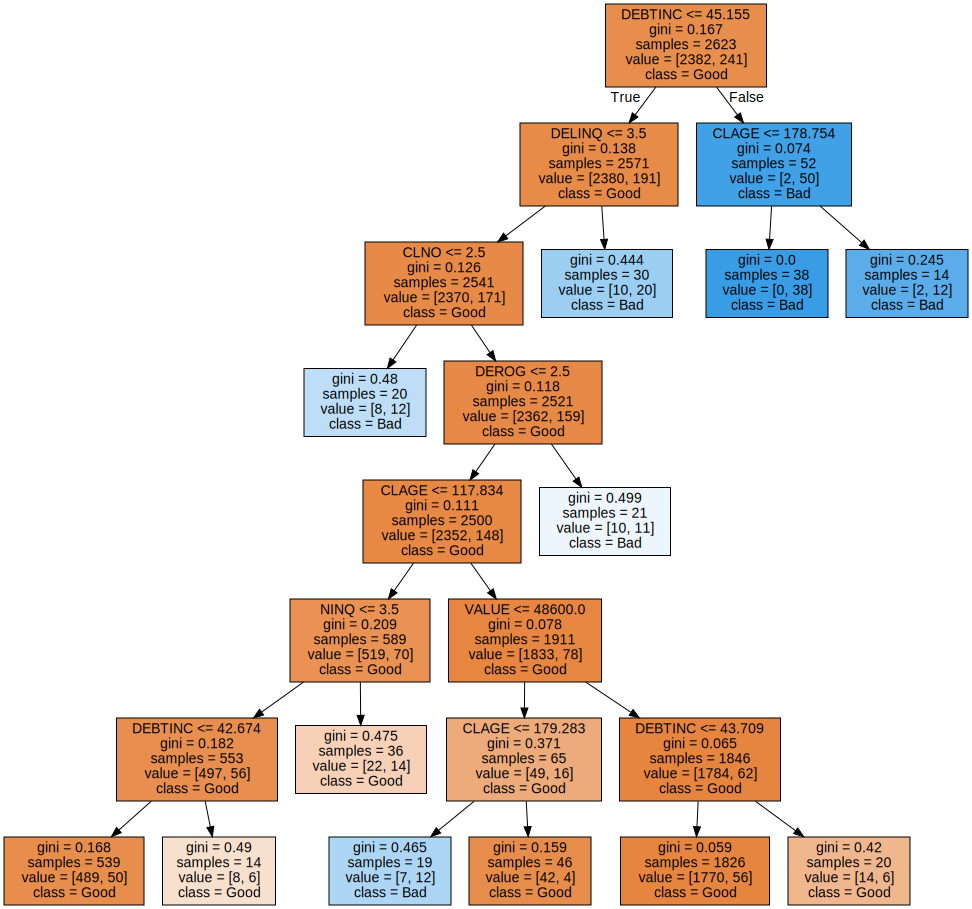

In [40]:
export_graphviz(tree_final, out_file="tree_final_over.dot",class_names=["Good","Bad"], feature_names= v_feature_name, impurity=True, filled=True)

with open("tree_final_over.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [41]:
y_pred_over=tree_final_over.predict(df_test_x_over)
print("Accuracy:{0:.3f}\n".format(tree_final_over.score(df_test_x_over, df_test_y_over)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y_over , y_pred_over)))

print(classification_report(df_test_y_over, y_pred_over, digits=3))

Accuracy:0.670

Test Confusion Matrix:
[[701  14]
 [458 257]]
              precision    recall  f1-score   support

           0      0.605     0.980     0.748       715
           1      0.948     0.359     0.521       715

    accuracy                          0.670      1430
   macro avg      0.777     0.670     0.635      1430
weighted avg      0.777     0.670     0.635      1430



In [42]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final_over.feature_importances_

In [43]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
9,DEBTINC,0.563
5,DELINQ,0.139
6,CLAGE,0.091
8,CLNO,0.075
4,DEROG,0.059
2,VALUE,0.037
7,NINQ,0.037
13,JOB_OTHER,0.000
17,JOB_Sales,0.000
16,JOB_ProfExe,0.000


Text(0, 0.5, '설명변수')

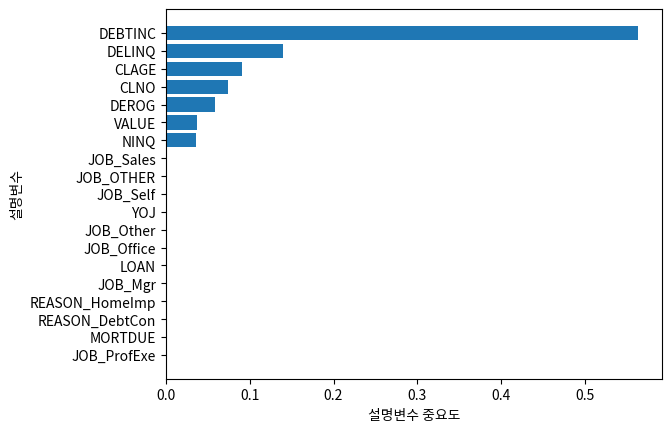

In [44]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [45]:
estimator= DecisionTreeClassifier()
param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=4)

best parameter:
{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 4}

best score:
0.93


# 랜덤 포레스트

In [92]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report


In [93]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [94]:
df_raw["JOB"].fillna("OTHER", inplace=True)

In [95]:
df_raw.fillna(df_raw.mean(), inplace=True)

/tmp/ipykernel_7706/561761817.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [96]:
df_raw_dummy= pd.get_dummies(df_raw)

In [61]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)

In [62]:
df_raw_y=df_raw_dummy["BAD"]

In [63]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=1234)

In [64]:
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (3748, 19)
분할 후 설명변수 데이터: Train (2623, 19)  Test (1125, 19)


In [ ]:
from imblearn.over_sampling import SMOTE

print(df_raw.value_counts(["BAD"]),"\n")
print("BAD=1 비율", df_raw.value_counts(df_raw["BAD"]==1)/len(df_raw))

plt.figure(figsize=(10,8))
df_raw['color']=np.where(df_raw["BAD"]==1, "red","blue")



In [ ]:
plt.scatter(df_raw['LOAN'],df_raw['VALUE'],c= df_raw['color'], s=30, alpha=0.5)
plt.show()

In [ ]:
sm=SMOTE(sampling_strategy='auto')

x_resampled, y_resampled =sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))


In [65]:
rf_uncust=DecisionTreeClassifier(random_state=1234)
rf_uncust.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.927


In [66]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [67]:
train_accuracy=[]; test_accuracy=[]
para_n_tree =[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf= RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [68]:
df_accuracy_n= pd.DataFrame()
df_accuracy_n["n_estiators"]=para_n_tree
df_accuracy_n["TrainScore"]= train_accuracy
df_accuracy_n["TestScore"]=test_accuracy
df_accuracy_n.round(3)

,n_estiators,TrainScore,TestScore
0,10,0.993,0.939
1,20,0.999,0.944
2,30,0.999,0.941
3,40,1.000,0.941
4,50,1.000,0.942
5,60,1.000,0.944
6,70,1.000,0.944
7,80,1.000,0.946
8,90,1.000,0.945
9,100,1.000,0.946


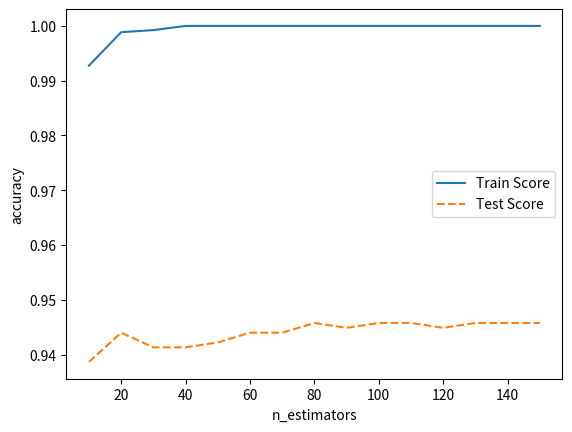

In [69]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [70]:
oob_error=[]

for v_n_estimators in range(5,121) :
    rf= RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

KeyboardInterrupt: 

In [ ]:
plt.plot(range(5,121),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [71]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(3,11)]

for v_max_depth in para_depth :
    rf= RandomForestClassifier(max_depth=v_max_depth, n_estimators=100,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [72]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.931,0.927
1,4,0.934,0.930
2,5,0.936,0.931
3,6,0.941,0.932
4,7,0.943,0.933
5,8,0.946,0.935
6,9,0.950,0.937
7,10,0.954,0.938


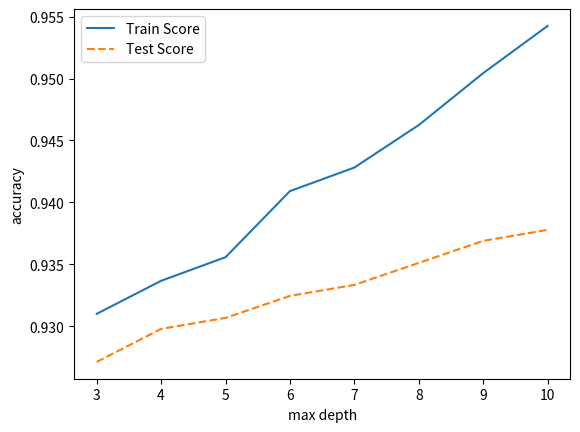

In [73]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [74]:
train_accuracy=[]; test_accuracy=[]
para_depth=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf= RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=6, n_estimators=100,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [75]:
df_accuracy_split= pd.DataFrame()
df_accuracy_split["Depth"]=para_split
df_accuracy_split["TrainScore"]= train_accuracy
df_accuracy_split["TestScore"]=test_accuracy
df_accuracy_split.round(3)

,Depth,TrainScore,TestScore
0,4,0.941,0.932
1,6,0.941,0.932
2,8,0.940,0.932
3,10,0.939,0.932
4,12,0.936,0.932
5,14,0.937,0.932
6,16,0.936,0.932
7,18,0.935,0.932
8,20,0.934,0.932
9,22,0.935,0.932


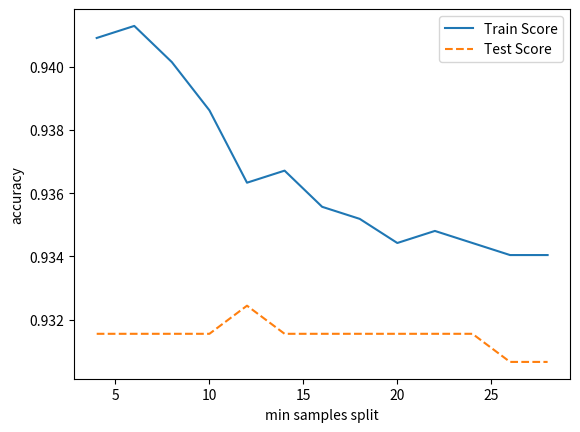

In [76]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [77]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[leaf for leaf in range(3,11)]

for v_min_samples_leaf in para_leaf :
    rf= RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=6, n_estimators=100,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

In [80]:
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainScore"]= train_accuracy
df_accuracy_leaf["TestScore"]=test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,3,0.939,0.932
1,4,0.939,0.932
2,5,0.935,0.931
3,6,0.934,0.932
4,7,0.933,0.932
5,8,0.933,0.931
6,9,0.933,0.931
7,10,0.933,0.930


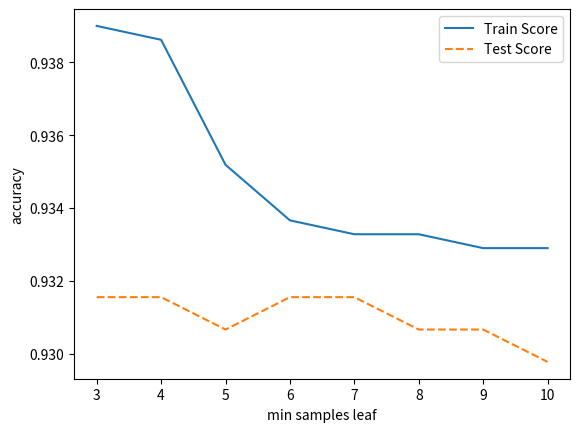

In [81]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

In [85]:
rf_final= RandomForestClassifier(min_samples_leaf=20,max_depth=6,n_estimators=100,random_state=1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=20, random_state=1234)

In [86]:
y_pred=rf_final.predict(df_test_x)

In [87]:
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y_over , y_pred_over)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.926
Accuracy on test set: 0.924
Confusion Matrix:
[[701  14]
 [458 257]]
              precision    recall  f1-score   support

           0      0.924     0.999     0.960      1021
           1      0.952     0.192     0.320       104

    accuracy                          0.924      1125
   macro avg      0.938     0.596     0.640      1125
weighted avg      0.927     0.924     0.901      1125



In [88]:
v_feature_name= df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= rf_final.feature_importances_

In [89]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
9,DEBTINC,0.497
5,DELINQ,0.136
4,DEROG,0.079
6,CLAGE,0.061
8,CLNO,0.057
7,NINQ,0.043
0,LOAN,0.036
2,VALUE,0.035
1,MORTDUE,0.022
3,YOJ,0.013


Text(0, 0.5, '설명변수')

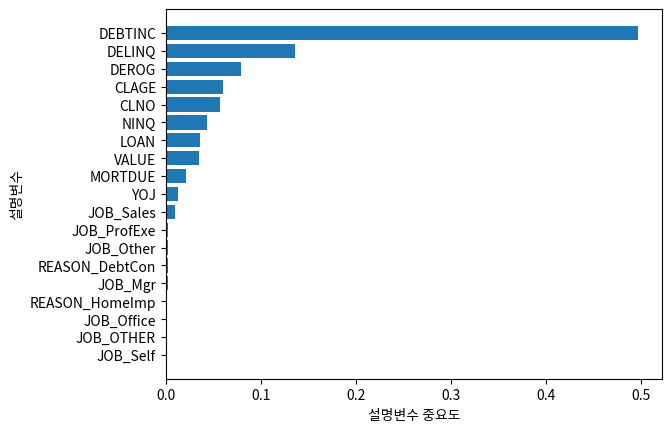

In [90]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [91]:
estimator= RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                       random_state=1234)

best parameter:
{'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 4}

best score:
0.941
